In [21]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pickle
import contextlib
from tqdm import tqdm  # Import tqdm for progress bar


import DiadFit as pf
pf.__version__

'1.0.5'

In [22]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [23]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [24]:
glasses=pd.read_excel('KAM_EDS_12062024.xlsx',sheet_name='concatenated_glasses')
glasses
glass_reps=pd.read_excel('Helper_file_120624.xlsx',sheet_name='Glass_EDS_reps')

glasses_wnames=pd.merge(left=glass_reps,right=glasses,on=['Name_windex'],how='left')
glasses_wnames


,Index_x,Sample Name_x,Name_windex,Name_Full_gl,Sample,Crystal,Type,Index_y,Sample Name_y,Total_wt%,...,k Ratio_Sc,Apparent Concentration_Cu,Apparent Concentration_Sc,Factory Standard_Cu,Factory Standard_Sc,Line_Cu,Line_Sc,#_ions__Cu,#_ions__Ni,#_ions__Sc
0,0,KA611_c217_MIA,KA611_c217_MIA_0,KA611_c217_MIA,KA611,c217,MI,0,KA611_c217_MIA,98.8903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,KA79_c223_MIA,KA79_c223_MIA_1,KA79_c223_MIA,KA79,c223,MI,1,KA79_c223_MIA,99.0127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,KA69_c204_MIC,KA69_c204_MIC_2,KA69_c204_MIC,KA69,c204,MI,2,KA69_c204_MIC,98.0678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,KA69_c209_MIA,KA69_c209_MIA_3,KA69_c209_MIA,KA69,c209,MI,3,KA69_c209_MIA,98.8986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,KA69_c209_MIB,KA69_c209_MIB_4,KA69_c209_MIB,KA69,c209,MI,4,KA69_c209_MIB,99.3526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,KA71_c205_MI4_WDS,KA71_c205_MI4_WDS_242,KA71_c205_MI4,KA71,c205,MI,242,KA71_c205_MI4_WDS,97.9150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,243,KA71_c206_MI1,KA71_c206_MI1_243,KA71_c206_MI1,KA71,c206,MI,243,KA71_c206_MI1,98.5615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,244,KA71_c206_MI1_WDS,KA71_c206_MI1_WDS_244,KA71_c206_MI1,KA71,c206,MI,244,KA71_c206_MI1_WDS,98.4160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,245,KA71_c201_MI1_r2,KA71_c201_MI1_r2_245,KA71_c201_MI1,KA71,c201,MI,245,KA71_c201_MI1_r2,99.8478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
## Filter the glasses (to ignore EDS spots when WDS is available)

# This part is to filter out rows which have EDS AND WDS so only the WDS is kept to average
base_names = set(glasses_wnames['Sample Name_x'].str.rstrip('_WDS'))

def filter_rows(row):
    base_name = row.rstrip('_WDS')
    if row.endswith('_WDS'):
        return True 
    elif f"{base_name}_WDS" not in list(glasses_wnames['Sample Name_x']):

        return True
    else:
        return False

glasses_filtered = glasses_wnames[glasses_wnames['Sample Name_x'].apply(filter_rows)]

glasses_filtered

,Index_x,Sample Name_x,Name_windex,Name_Full_gl,Sample,Crystal,Type,Index_y,Sample Name_y,Total_wt%,...,k Ratio_Sc,Apparent Concentration_Cu,Apparent Concentration_Sc,Factory Standard_Cu,Factory Standard_Sc,Line_Cu,Line_Sc,#_ions__Cu,#_ions__Ni,#_ions__Sc
9,9,KA69_c202_MID,KA69_c202_MID_9,KA69_c202_MID,KA69,c202,MI,9,KA69_c202_MID,98.9952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,KA69_c202_MIE,KA69_c202_MIE_10,KA69_c202_MIE,KA69,c202,MI,10,KA69_c202_MIE,99.6844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,KA69_c206_MIB_r1,KA69_c206_MIB_r1_11,KA69_c206_MIB,KA69,c206,MI,11,KA69_c206_MIB_r1,97.8028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,KA69_c201_MI1,KA69_c201_MI1_13,KA69_c201_MI1,KA69,c201,MI,13,KA69_c201_MI1,98.1264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,KA69_c201_matrixglass_spot1,KA69_c201_matrixglass_spot1_14,KA69_c201_matrixglass,KA69,c201,matrixglass,14,KA69_c201_matrixglass_spot1,98.1261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,KA71_c203x2_MI1_WDS,KA71_c203x2_MI1_WDS_238,KA71_c203x2_MI1,KA71,c203x2,MI,238,KA71_c203x2_MI1_WDS,99.5356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,240,KA71_c204_MI1_WDS,KA71_c204_MI1_WDS_240,KA71_c204_MI1,KA71,c204,MI,240,KA71_c204_MI1_WDS,95.6210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,242,KA71_c205_MI4_WDS,KA71_c205_MI4_WDS_242,KA71_c205_MI4,KA71,c205,MI,242,KA71_c205_MI4_WDS,97.9150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,244,KA71_c206_MI1_WDS,KA71_c206_MI1_WDS_244,KA71_c206_MI1,KA71,c206,MI,244,KA71_c206_MI1_WDS,98.4160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's average the MI glasses (when there are reps)

In [26]:
MI_glasses=glasses_filtered[glasses_filtered['Type'].str.contains('MI')]
MI_glasses=MI_glasses[['Sample Name_x','Name_Full_gl','Sample','Al2O3','CaO','Cl','Cr2O3','FeOt','K2O','MgO','MnO','Na2O','NiO','P2O5','SO3','SiO2','TiO2',
             'Oxide % Sigma_Al2O3','Oxide % Sigma_CaO','Oxide % Sigma_Cl','Oxide % Sigma_Cr2O3','Oxide % Sigma_FeOt','Oxide % Sigma_K2O','Oxide % Sigma_MgO',
             'Oxide % Sigma_MnO','Oxide % Sigma_Na2O','Oxide % Sigma_NiO','Oxide % Sigma_P2O5','Oxide % Sigma_SO3','Oxide % Sigma_SiO2','Oxide % Sigma_TiO2']]
MI_glasses

,Sample Name_x,Name_Full_gl,Sample,Al2O3,CaO,Cl,Cr2O3,FeOt,K2O,MgO,...,Oxide % Sigma_FeOt,Oxide % Sigma_K2O,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_P2O5,Oxide % Sigma_SO3,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2
9,KA69_c202_MID,KA69_c202_MID,KA69,14.5083,13.7698,0.0,0.0714,10.3320,0.5050,5.3596,...,0.0542,0.0141,0.0360,0.0226,0.0316,NaN,0.0274,0.0274,0.0912,0.0315
10,KA69_c202_MIE,KA69_c202_MIE,KA69,14.4617,13.3878,0.0,0.0491,10.1756,0.4526,6.7641,...,0.0538,0.0138,0.0388,0.0225,0.0319,NaN,0.0261,0.0264,0.0919,0.0300
11,KA69_c206_MIB_r1,KA69_c206_MIB,KA69,13.9095,13.7618,0.0,0.0642,11.2427,0.4538,5.2180,...,0.0559,0.0138,0.0357,0.0227,0.0316,NaN,0.0260,0.0265,0.0903,0.0308
13,KA69_c201_MI1,KA69_c201_MI1,KA69,7.9068,3.6044,0.0,0.0721,14.0432,0.2300,25.5970,...,0.0607,0.0128,0.0646,0.0226,0.0297,NaN,0.0258,0.0251,0.0906,0.0239
17,KA79_c201_MIB_r1,KA79_c201_MIB,KA79,15.7002,14.0397,0.0,0.0772,6.5639,0.7296,2.7808,...,0.0458,0.0147,0.0288,0.0220,0.0305,NaN,0.0269,0.0252,0.0918,0.0336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,KA71_c203x2_MI1_WDS,KA71_c203x2_MI1,KA71,12.4507,12.6925,0.0,NaN,11.1159,0.5759,8.0260,...,0.0556,0.0143,0.0414,0.0227,0.0309,NaN,0.0271,0.0082,0.0913,0.0332
240,KA71_c204_MI1_WDS,KA71_c204_MI1,KA71,12.5716,11.9676,0.0,NaN,8.1338,0.4948,8.0115,...,0.0493,0.0138,0.0404,0.0220,0.0308,NaN,0.0260,0.0074,0.0909,0.0323
242,KA71_c205_MI4_WDS,KA71_c205_MI4,KA71,12.2249,11.9860,0.0,NaN,10.8271,0.4510,9.1441,...,0.0550,0.0138,0.0431,0.0227,0.0306,NaN,0.0262,0.0079,0.0909,0.0314
244,KA71_c206_MI1_WDS,KA71_c206_MI1,KA71,14.5270,12.9799,0.0,NaN,7.4726,0.4663,3.8862,...,0.0479,0.0138,0.0318,0.0222,0.0325,NaN,0.0265,0.0075,0.0934,0.0329


In [27]:
# Function to calculate mean excluding NaN and 0 values
def mean_excluding_nan_zero(series):
    return series[~series.isna() & (series != 0)].mean()

# Group by 'Name_Full_gl'
grouped = MI_glasses.groupby('Name_Full_gl')
numeric_cols_ol = MI_glasses.select_dtypes(include='number')
non_numeric_cols = MI_glasses.select_dtypes(exclude='number')

numeric_MIgl_averaged_mean = grouped[numeric_cols_ol.columns].agg(mean_excluding_nan_zero)

numeric_MIgl_averaged_std = grouped[numeric_cols_ol.columns].std()
non_numeric_MIgl_averaged = grouped[non_numeric_cols.columns].first()

MIgl_averaged = pd.concat([numeric_MIgl_averaged_mean, non_numeric_MIgl_averaged], axis=1)

MIgl_averaged = MIgl_averaged.reindex(columns=MI_glasses.columns)

# std_columns = numeric_MIgl_averaged_std.add_suffix('_spot_std')

# MIgl_averaged = pd.concat([MIgl_averaged, std_columns], axis=1)

MIgl_averaged = MIgl_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')
row_counts['spot averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'spot averaged?'] = 'Yes'
MIgl_averaged = pd.merge(MIgl_averaged, row_counts[['Name_Full_gl', 'spot averaged?']], on='Name_Full_gl', how='outer')
MIgl_averaged['spot averaged?'] = MIgl_averaged['spot averaged?'].fillna('No')

MIgl_averaged.to_clipboard(excel=True, index=False)
MIgl_averaged.to_excel(compilation_folder+'/'+"KAM_MI_glasses_averaged_spots.xlsx")
MIgl_averaged


,Sample Name_x,Name_Full_gl,Sample,Al2O3,CaO,Cl,Cr2O3,FeOt,K2O,MgO,...,Oxide % Sigma_K2O,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_P2O5,Oxide % Sigma_SO3,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2,spot averaged?
0,KA611_c207_MIA_r2,KA611_c207_MIA,KA611,12.710700,9.637000,NaN,0.029400,10.536400,0.875200,9.307100,...,0.015300,0.043500,0.022200,0.035200,NaN,0.027300,0.027300,0.089900,0.028000,No
1,KA611_c208_MIA_r1,KA611_c208_MIA,KA611,12.972300,13.060475,NaN,0.051350,11.289125,0.724400,8.275050,...,0.014150,0.040100,0.021600,0.032000,NaN,0.025100,0.021875,0.085300,0.028550,Yes
2,KA611_c209_MIA_r2_WDS,KA611_c209_MIA,KA611,13.686300,13.159400,NaN,0.071100,10.169900,0.990500,8.256700,...,0.015700,0.041800,0.022400,0.034100,NaN,0.026800,0.009300,0.089000,0.030800,No
3,KA611_c210_MIB_r1,KA611_c210_MIB,KA611,13.220400,12.218250,NaN,0.044000,10.750700,1.670200,6.067700,...,0.016200,0.034350,0.020500,0.032650,NaN,0.027550,0.020650,0.080550,0.027700,Yes
4,KA611_c212_MIA_r1,KA611_c212_MIA,KA611,12.973400,12.920433,NaN,0.062100,10.527500,0.633867,8.407700,...,0.013600,0.039600,0.021100,0.032600,0.0276,0.025133,0.021433,0.084067,0.028733,Yes
5,KA611_c212_MIC_WDS,KA611_c212_MIC,KA611,13.221500,13.066450,NaN,NaN,10.383100,1.032250,7.886650,...,0.013100,0.033800,0.018400,0.028000,NaN,0.022750,0.011200,0.073400,0.025400,Yes
6,KA611_c213_MIA_WDS,KA611_c213_MIA,KA611,13.514200,12.237300,NaN,0.382900,10.580900,0.532600,8.913200,...,0.014100,0.043100,0.022800,0.032900,NaN,0.026800,0.007700,0.091200,0.033800,No
7,KA611_c214_MIA_r2_WDS,KA611_c214_MIA,KA611,15.325800,14.281700,NaN,0.322200,9.441900,0.850100,4.653600,...,0.015300,0.034300,0.022600,0.033400,NaN,0.027100,0.009900,0.089800,0.032200,No
8,KA611_c217_MIA_WDS,KA611_c217_MIA,KA611,13.861900,12.672600,NaN,NaN,10.250100,1.286800,7.416600,...,0.013800,0.033300,0.018400,0.029400,NaN,0.023400,0.009200,0.074000,0.025200,No
9,KA611_c218_MIA_r2,KA611_c218_MIA,KA611,12.591750,13.451250,NaN,0.024000,10.224600,0.694450,9.077900,...,0.013350,0.039100,0.020450,0.028850,NaN,0.024000,0.017750,0.081550,0.028050,Yes


## Now let's average just the matrix glasses 

In [28]:
matrixglasses=glasses_filtered[glasses_filtered['Type'].str.contains('matrixglass')]
matrixglasses=matrixglasses[['Sample Name_x','Name_Full_gl','Sample','Al2O3','CaO','Cl','Cr2O3','FeOt','K2O','MgO','MnO','Na2O','NiO','P2O5','SO3','SiO2','TiO2',
             'Oxide % Sigma_Al2O3','Oxide % Sigma_CaO','Oxide % Sigma_Cl','Oxide % Sigma_Cr2O3','Oxide % Sigma_FeOt','Oxide % Sigma_K2O','Oxide % Sigma_MgO',
             'Oxide % Sigma_MnO','Oxide % Sigma_Na2O','Oxide % Sigma_NiO','Oxide % Sigma_P2O5','Oxide % Sigma_SO3','Oxide % Sigma_SiO2','Oxide % Sigma_TiO2']]
matrixglasses

,Sample Name_x,Name_Full_gl,Sample,Al2O3,CaO,Cl,Cr2O3,FeOt,K2O,MgO,...,Oxide % Sigma_FeOt,Oxide % Sigma_K2O,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_P2O5,Oxide % Sigma_SO3,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2
14,KA69_c201_matrixglass_spot1,KA69_c201_matrixglass,KA69,13.7416,12.1951,0.0,0.0342,11.4259,0.4956,7.1239,...,0.0563,0.0140,0.0396,0.0226,0.0321,NaN,0.0261,0.0263,0.0908,0.0302
15,KA69_c201_matrixglass_spot2,KA69_c201_matrixglass,KA69,13.7877,12.2045,0.0,0.0388,11.3461,0.5010,7.1112,...,0.0561,0.0140,0.0396,0.0228,0.0320,NaN,0.0263,0.0263,0.0909,0.0301
37,KA71_c203x4_matrixglass_spot1,KA71_c203x4_matrixglass,KA71,12.2979,12.7104,0.0,0.1041,11.4950,0.6731,9.3467,...,0.0565,0.0147,0.0437,0.0227,0.0316,NaN,0.0263,0.0260,0.0895,0.0307
38,KA71_c203x4_matrixglass_spot2,KA71_c203x4_matrixglass,KA71,12.3636,12.8299,0.0,0.1075,11.6070,0.6642,9.4001,...,0.0566,0.0146,0.0438,0.0227,0.0319,NaN,0.0264,0.0263,0.0899,0.0308
39,KA71_c203x2_matrixglass_spot1,KA71_c203x2_matrixglass,KA71,12.0964,12.9134,0.0,0.1198,11.6382,0.6516,9.0162,...,0.0566,0.0145,0.0431,0.0226,0.0314,NaN,0.0263,0.0261,0.0891,0.0308
40,KA71_c203x2_matrixglass_spot3,KA71_c203x2_matrixglass,KA71,12.2925,12.7347,0.0,0.1486,11.5851,0.6817,9.3427,...,0.0567,0.0146,0.0438,0.0227,0.0317,NaN,0.0262,0.0263,0.0898,0.0307
42,KA71_c204_matrixglass_spot1,KA71_c204_matrixglass,KA71,12.2907,12.6908,0.0,0.1148,11.6548,0.6507,9.4991,...,0.0566,0.0146,0.0441,0.0226,0.0319,NaN,0.0262,0.0262,0.0899,0.0306
44,KA71_c205_matrixglass_spot1,KA71_c205_matrixglass,KA71,12.3244,12.8166,0.0,0.0956,11.5372,0.6654,9.4790,...,0.0566,0.0146,0.0439,0.0228,0.0317,NaN,0.0265,0.0262,0.0897,0.0308
45,KA71_c205_matrixglass_spot2,KA71_c205_matrixglass,KA71,12.5172,12.8208,0.0,0.1024,11.6289,0.6542,9.5442,...,0.0567,0.0147,0.0442,0.0227,0.0319,NaN,0.0264,0.0264,0.0902,0.0308
61,KA611_c208_heatedglass,KA611_c208_heatedglass,KA611,13.7980,13.6426,0.0,0.0641,11.3638,0.7376,6.7985,...,0.0560,0.0149,0.0392,0.0228,0.0333,NaN,0.0265,0.0242,0.0900,0.0306


In [29]:
# Function to calculate mean excluding NaN and 0 values
def mean_excluding_nan_zero(series):
    return series[~series.isna() & (series != 0)].mean()

# Group by 'Name_Full_gl'
grouped = matrixglasses.groupby('Name_Full_gl')
numeric_cols_ol = matrixglasses.select_dtypes(include='number')
non_numeric_cols = matrixglasses.select_dtypes(exclude='number')

numeric_matgl_averaged_mean = grouped[numeric_cols_ol.columns].agg(mean_excluding_nan_zero)

numeric_matgl_averaged_std = grouped[numeric_cols_ol.columns].std()
non_numeric_matgl_averaged = grouped[non_numeric_cols.columns].first()

matgl_averaged = pd.concat([numeric_matgl_averaged_mean, non_numeric_matgl_averaged], axis=1)

matgl_averaged = matgl_averaged.reindex(columns=matrixglasses.columns)

# std_columns = numeric_matgl_averaged_std.add_suffix('_spot_std')

# matgl_averaged = pd.concat([matgl_averaged, std_columns], axis=1)

matgl_averaged = matgl_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')
row_counts['spot averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'spot averaged?'] = 'Yes'
matgl_averaged = pd.merge(matgl_averaged, row_counts[['Name_Full_gl', 'spot averaged?']], on='Name_Full_gl', how='outer')
matgl_averaged['spot averaged?'] = matgl_averaged['spot averaged?'].fillna('No')

matgl_averaged.to_clipboard(excel=True, index=False)
matgl_averaged.to_excel(compilation_folder+'/'+"KAM_matrixglasses_averaged_spots.xlsx")
matgl_averaged


,Sample Name_x,Name_Full_gl,Sample,Al2O3,CaO,Cl,Cr2O3,FeOt,K2O,MgO,...,Oxide % Sigma_K2O,Oxide % Sigma_MgO,Oxide % Sigma_MnO,Oxide % Sigma_Na2O,Oxide % Sigma_NiO,Oxide % Sigma_P2O5,Oxide % Sigma_SO3,Oxide % Sigma_SiO2,Oxide % Sigma_TiO2,spot averaged?
0,KA611_c208_heatedglass,KA611_c208_heatedglass,KA611,13.798000,13.642600,NaN,0.064100,11.363800,0.737600,6.798500,...,0.014900,0.039200,0.022800,0.033300,NaN,0.026500,0.024200,0.090000,0.030600,No
1,KA69_c201_matgl_3_WDS,KA69_c201_matgl,KA69,13.780400,12.293000,NaN,NaN,11.489000,0.518000,7.109500,...,0.010000,0.028100,0.016100,0.022600,NaN,0.018700,0.008600,0.064700,0.021600,No
2,KA69_c201_matrixglass_spot1,KA69_c201_matrixglass,KA69,13.806067,12.211500,NaN,0.037433,11.404333,0.502300,7.127733,...,0.014033,0.039667,0.022667,0.032100,NaN,0.026233,0.026333,0.090967,0.030167,Yes
3,KA69_c205_matglass_WDS,KA69_c205_matglass,KA69,13.834900,12.422900,NaN,NaN,11.538000,0.528100,7.227600,...,0.011600,0.032900,0.018800,0.026500,NaN,NaN,0.008700,0.075100,0.025100,No
4,KA69_c205_matrixglass_spot1,KA69_c205_matrixglass,KA69,13.646950,12.174400,NaN,0.040950,11.346100,0.518300,7.079450,...,0.014000,0.039550,0.022550,0.031900,NaN,0.026200,0.026250,0.090650,0.030250,Yes
5,KA69_gl1_1_WDS,KA69_gl1_1,KA69,13.791600,12.266300,NaN,NaN,11.500700,0.513300,7.068400,...,0.010000,0.028100,0.016100,0.022700,NaN,0.018700,0.008500,0.064800,0.021600,No
6,KA69_gl1_2_widearea_WDS,KA69_gl1_2,KA69,13.736800,12.404500,NaN,NaN,11.742800,0.539400,7.095200,...,0.010100,0.028100,0.016200,0.022700,NaN,0.018700,0.008400,0.064900,0.021700,No
7,KA69_gl2_1_WDS,KA69_gl2_1,KA69,13.733500,12.273700,NaN,NaN,11.506200,0.506800,7.110600,...,0.010000,0.028100,0.016100,0.022600,NaN,0.018700,0.008700,0.064700,0.021500,No
8,KA71_c202_matgl_3_WDS,KA71_c202_matgl,KA71,12.222100,12.760100,NaN,0.099250,11.614850,0.667600,9.261450,...,0.010400,0.030900,0.016200,0.022300,NaN,0.018600,0.013500,0.063600,0.021900,Yes
9,KA71_c202_matrixglass_spot1,KA71_c202_matrixglass,KA71,12.239750,12.698350,NaN,0.089500,11.569750,0.656600,9.311400,...,0.014600,0.043700,0.022700,0.031650,NaN,0.026250,0.026150,0.089500,0.030600,Yes


## Now average all matrixglasses for a specific sample.

In [30]:
# Function to calculate mean excluding NaN and 0 values
def mean_excluding_nan_zero(series):
    return series[~series.isna() & (series != 0)].mean()

# Group by 'Name_Full_gl'
grouped = matgl_averaged.groupby('Sample')
numeric_cols_ol = matgl_averaged.select_dtypes(include='number')
non_numeric_cols = matgl_averaged.select_dtypes(exclude='number')

numeric_df_averaged_mean = grouped[numeric_cols_ol.columns].agg(mean_excluding_nan_zero)

numeric_df_averaged_std = grouped[numeric_cols_ol.columns].std()
non_numeric_df_averaged = grouped[non_numeric_cols.columns].first()

df_averaged = pd.concat([numeric_df_averaged_mean, non_numeric_df_averaged], axis=1)

df_averaged = df_averaged.reindex(columns=matgl_averaged.columns)

std_columns = numeric_df_averaged_std.add_suffix('_sample_std')

df_averaged = pd.concat([df_averaged, std_columns], axis=1)

df_averaged = df_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')
row_counts['sample averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'sample averaged?'] = 'Yes'
df_averaged = pd.merge(df_averaged, row_counts[['Sample', 'sample averaged?']], on='Sample', how='outer')
df_averaged['sample averaged?'] = df_averaged['sample averaged?'].fillna('No')

df_averaged=df_averaged.drop(['Sample Name_x','Name_Full_gl'], axis=1, inplace=False)
df_averaged=df_averaged.dropna(axis=1, how='all', inplace=False)


df_averaged['Total (wt%)'] = df_averaged.iloc[:, 1:13].sum(axis=1)
df_averaged.insert(1, 'Total (wt%)', df_averaged.pop('Total (wt%)'))

for col in df_averaged.columns[2:14]:
    df_averaged[f'{col}_wt%uncertainty ({col}_sample_std when it was averaged, {col}_Oxide sigma% when it was a single spot)'] = df_averaged.apply(
        lambda row: row[f'{col}_sample_std'] if row['sample averaged?'] != 'No' else row[f'Oxide % Sigma_{col}'], axis=1)
    
df_averaged.to_clipboard(excel=True, index=False)
df_averaged.to_excel(compilation_folder+'/'+"KAM_matgl_averaged_averaged_sample.xlsx")

df_averaged


,Sample,Total (wt%),Al2O3,CaO,Cr2O3,FeOt,K2O,MgO,MnO,Na2O,...,"Cr2O3_wt%uncertainty (Cr2O3_sample_std when it was averaged, Cr2O3_Oxide sigma% when it was a single spot)","FeOt_wt%uncertainty (FeOt_sample_std when it was averaged, FeOt_Oxide sigma% when it was a single spot)","K2O_wt%uncertainty (K2O_sample_std when it was averaged, K2O_Oxide sigma% when it was a single spot)","MgO_wt%uncertainty (MgO_sample_std when it was averaged, MgO_Oxide sigma% when it was a single spot)","MnO_wt%uncertainty (MnO_sample_std when it was averaged, MnO_Oxide sigma% when it was a single spot)","Na2O_wt%uncertainty (Na2O_sample_std when it was averaged, Na2O_Oxide sigma% when it was a single spot)","P2O5_wt%uncertainty (P2O5_sample_std when it was averaged, P2O5_Oxide sigma% when it was a single spot)","SO3_wt%uncertainty (SO3_sample_std when it was averaged, SO3_Oxide sigma% when it was a single spot)","SiO2_wt%uncertainty (SiO2_sample_std when it was averaged, SiO2_Oxide sigma% when it was a single spot)","TiO2_wt%uncertainty (TiO2_sample_std when it was averaged, TiO2_Oxide sigma% when it was a single spot)"
0,KA611,98.425800,13.798000,13.642600,0.064100,11.363800,0.737600,6.798500,0.197200,2.781500,...,0.021700,0.056000,0.014900,0.039200,0.022800,0.033300,0.026500,0.024200,0.090000,0.030600
1,KA69,98.550788,13.761460,12.292329,0.039192,11.503876,0.518029,7.116926,0.192621,2.431760,...,0.002487,0.124692,0.012610,0.052745,0.010611,0.023635,0.018875,0.026379,0.297720,0.030917
2,KA71,98.305960,12.277140,12.747644,0.097735,11.607199,0.664968,9.399139,0.183107,2.285132,...,0.014994,0.041386,0.007849,0.089156,0.012150,0.033502,0.015880,0.014329,0.256646,0.019322
3,KA78,99.318168,13.759988,11.526950,0.060580,11.275487,0.439700,7.257138,0.177638,2.384425,...,0.023366,0.044097,0.008109,0.056254,0.023371,0.027736,0.016670,0.022867,0.209191,0.012858


In [31]:
## Plot glass MI S vs matrix glass S

In [32]:
matgl_averaged['SO3']

0     0.051700
1     0.428200
2     0.467767
3     0.458100
4     0.457500
5     0.402900
6     0.404200
7     0.428900
8     0.421950
9     0.388950
10    0.409500
11    0.435067
12    0.395400
13    0.404400
14    0.403100
15    0.394000
16    0.424300
17    0.408950
18    0.415667
19    0.392200
20    0.362800
21    0.367700
22    0.361600
23    0.361800
24    0.359600
25    0.369600
26    0.369300
27    0.428400
Name: SO3, dtype: float64

In [33]:
MIgl_averaged['SO3']

0     0.669300
1     0.466475
2     0.508100
3     1.037750
4     0.635400
5     0.794350
6     0.310800
7     0.559600
8     0.496100
9     0.498250
10    0.183200
11    0.486550
12    0.604767
13    0.486000
14    0.465400
15    0.368100
16    0.358600
17    0.489600
18    0.572300
19    0.605000
20    0.327400
21    0.385500
22    0.438300
23    0.287750
24    0.353200
25    0.288400
26    0.345400
27    0.340900
28    0.411700
29    0.339250
30    0.260800
31    0.109040
32    0.399800
33    0.414200
34    0.388700
35    0.347550
36    0.287300
37    0.281167
38    0.311200
39    0.306700
40    0.302500
41    0.305567
42    0.140500
43    0.475720
44    0.351300
45    0.489500
46    0.312250
47    0.340800
48    0.345900
49    0.177567
50    0.350400
51    0.089600
52    0.023200
53    0.357925
54    0.307800
55    0.315300
56    0.182200
Name: SO3, dtype: float64

In [34]:
matgl_averaged['S_ppm']=10000*matgl_averaged['SO3']*32.065/80.06

MIgl_averaged['S_ppm']=10000*MIgl_averaged['SO3']*32.065/80.06


In [35]:
import seaborn as sns

Text(0.5, 1.0, 'All')

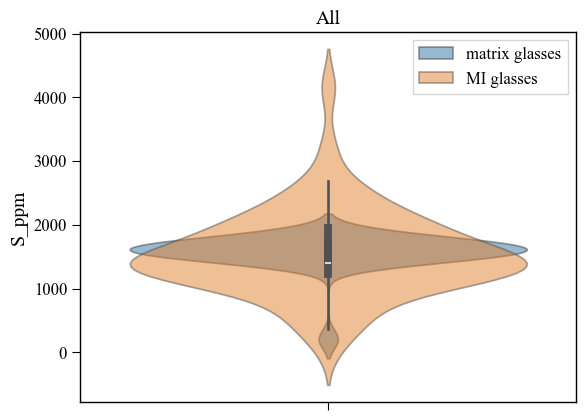

In [36]:
sns.violinplot(matgl_averaged['S_ppm'],alpha=0.5,label='matrix glasses')
sns.violinplot(MIgl_averaged['S_ppm'],alpha=0.5,label='MI glasses')
plt.legend()
plt.title("All")

Text(0.5, 1.0, 'Basanitoid')

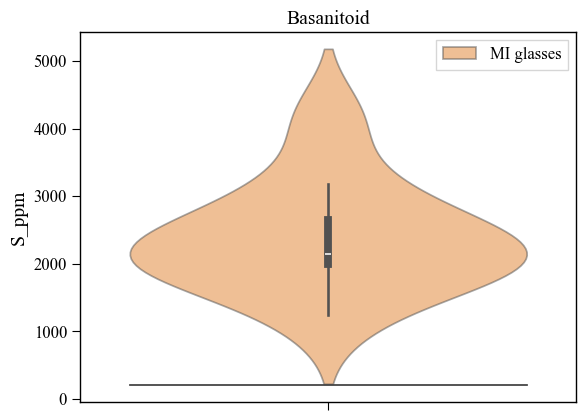

In [37]:
sns.violinplot(matgl_averaged['S_ppm'][matgl_averaged['Sample'].str.contains("KA611")],alpha=0.5,label='matrix glasses')
sns.violinplot(MIgl_averaged['S_ppm'][MIgl_averaged['Sample'].str.contains("KA611")],alpha=0.5,label='MI glasses')
plt.legend()
plt.title("Basanitoid")

Text(0.5, 1.0, 'Transitional')

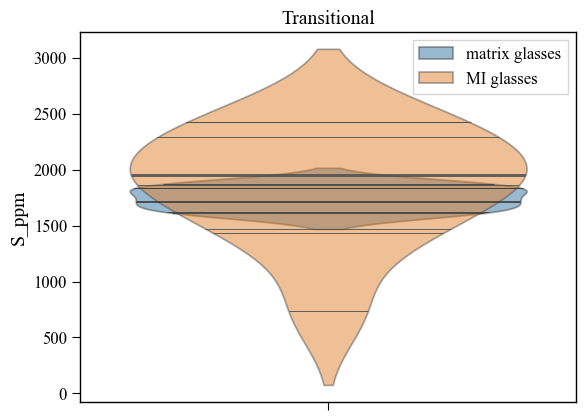

In [38]:
sns.violinplot(matgl_averaged['S_ppm'][matgl_averaged['Sample'].str.contains("KA69")],alpha=0.5,label='matrix glasses', inner='stick')
sns.violinplot(MIgl_averaged['S_ppm'][MIgl_averaged['Sample'].str.contains("KA69")],alpha=0.5,label='MI glasses', inner='stick')
plt.legend()
plt.title("Transitional")

Text(0.5, 1.0, 'Tholeiites')

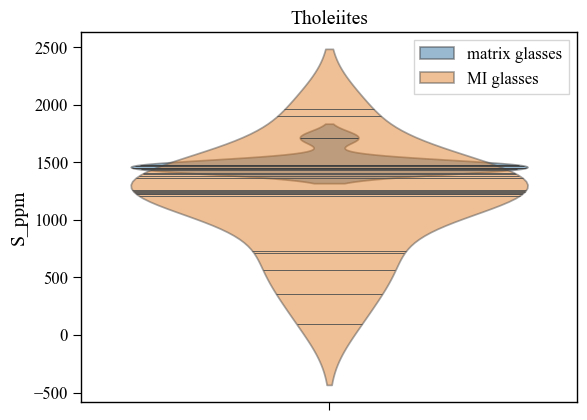

In [39]:
sns.violinplot(matgl_averaged['S_ppm'][matgl_averaged['Sample'].str.contains("KA79|KA78")],alpha=0.5,label='matrix glasses',  inner='stick')
sns.violinplot(MIgl_averaged['S_ppm'][MIgl_averaged['Sample'].str.contains("KA79|KA78")],alpha=0.5,label='MI glasses', inner='stick')
plt.legend()
plt.title("Tholeiites")

Text(0.5, 1.0, 'Alkalic-Basalt')

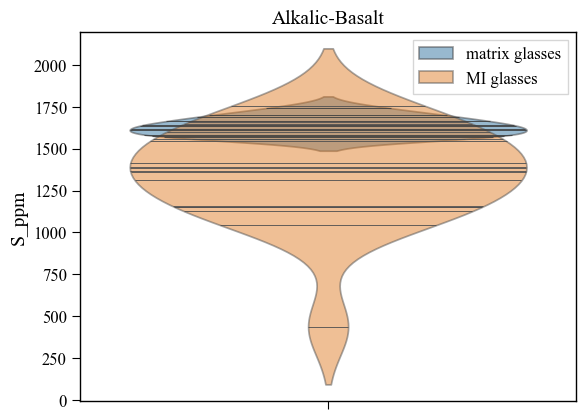

In [40]:
sns.violinplot(matgl_averaged['S_ppm'][matgl_averaged['Sample'].str.contains("KA71")],alpha=0.5,label='matrix glasses', inner='stick')
sns.violinplot(MIgl_averaged['S_ppm'][MIgl_averaged['Sample'].str.contains("KA71")],alpha=0.5,label='MI glasses',  inner='stick')

plt.legend()
plt.title("Alkalic-Basalt")

In [68]:
MIgl_averaged.loc[:,'Mg# of Glass']=100*(MIgl_averaged['MgO']/40.3044)/((MIgl_averaged['MgO']/40.3044)+(MIgl_averaged['FeOt']/71.844))
matgl_averaged.loc[:,'Mg# of Glass']=100*(matgl_averaged['MgO']/40.3044)/((matgl_averaged['MgO']/40.3044)+(matgl_averaged['FeOt']/71.844))

Garcia_wr=pd.read_excel(os.getcwd()+slash+'OtherVolcanoData & LiteratureData'+slash+"1995MOG_EastFlank.xlsx",sheet_name="Garcia_WR")

Garcia_wr.rename(columns={'Sample': 'Sample_old', 'Type': 'Rock type'}, inplace=True)

def create_new_sample(sample_str):
    parts = sample_str.split('-')
    new_sample = f"KA{parts[0][-1]}{parts[1]}"
    return new_sample

Garcia_wr['Sample'] = Garcia_wr['Sample_old'].apply(create_new_sample)
Garcia_wr.insert(0,'Sample',Garcia_wr.pop("Sample"))
Garcia_wr['FeOt']=Garcia_wr['Fe2O3']*0.899
# Garcia_wr.columns = [col + '_garciawr' for col in Garcia_wr.columns] 

Garcia_wr.head()


,Sample,Sample_old,Rock type,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,Total,LOI,FeOt
0,KA611,186-11,Basanitoid,43.21,2.66,12.06,13.46,0.17,13.76,9.68,3.16,1.21,0.44,99.73,0.64,12.10054
1,KA88,158-8,Hawaiite,47.04,3.77,17.60,12.43,0.21,4.12,8.73,4.67,1.48,0.66,100.40,0.11,11.17457
2,KA614,186-14,Hawaiite,46.06,4.17,14.17,14.36,0.19,6.33,10.30,3.66,1.11,0.61,99.83,0.1,12.90964
3,KA612,186-12,Hawaiite,47.49,4.36,16.40,13.33,0.20,3.43,10.29,3.88,1.20,0.63,100.11,0-40,11.98367
4,KA71,187-1,Alkalic basalt,42.93,1.33,7.08,13.31,0.18,26.16,7.68,1.28,0.38,0.14,99.37,-0.24,11.96569


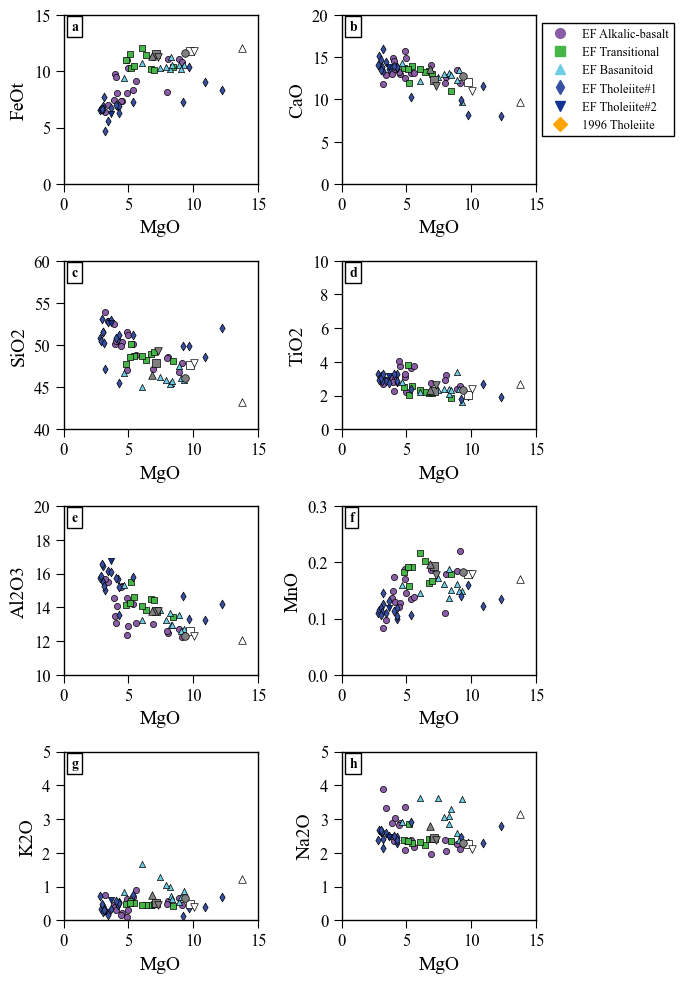

In [75]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plotdf=MIgl_averaged[~(MIgl_averaged['MgO']>20)].copy()
plotdf2=Garcia_wr.copy()
plotdf3=df_averaged.copy()

fig,axs=plt.subplots(4,2,figsize=(7,10))
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

color_dict = {
    "KA71": {'color': '#8A5CA6', 'marker': 'o'},  
    "KA69": {'color': '#46B649', 'marker': 's'},  
    "KA611": {'color': '#6FCDE4', 'marker': '^'},  
    "KA79": {'color': '#374FA2', 'marker': 'd'},  
    "KA78": {'color': '#113393', 'marker': 'v'},  
    "KA961": {'color': 'orange', 'marker': 'D'},

}

label_dict = {
    "KA71": "EF Alkalic-basalt",
    "KA69": "EF Transitional",
    "KA611": "EF Basanitoid",
    "KA79": "EF Tholeiite#1",
    "KA78": "EF Tholeiite#2",
    "KA961": "1996 Tholeiite"

}
for rock_type, color_info in color_dict.items():
    rock_data = plotdf[plotdf['Sample'] == rock_type]
    colors = color_info['color']
    markers = color_info['marker']
    
    # Scatter plot with the updated color and marker style
    axs[0,0].scatter(rock_data['MgO'], rock_data['FeOt'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[0,1].scatter(rock_data['MgO'], rock_data['CaO'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[1,0].scatter(rock_data['MgO'], rock_data['SiO2'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[1,1].scatter(rock_data['MgO'], rock_data['TiO2'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[2,0].scatter(rock_data['MgO'], rock_data['Al2O3'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[2,1].scatter(rock_data['MgO'], rock_data['MnO'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[3,0].scatter(rock_data['MgO'], rock_data['K2O'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)
    axs[3,1].scatter(rock_data['MgO'], rock_data['Na2O'], marker=markers, s=20,edgecolor='k', color=colors, linewidths=0.5)

for rock_type, color_info in color_dict.items():
    rock_data = plotdf2[plotdf2['Sample'] == rock_type]
    colors = color_info['color']
    markers = color_info['marker']
    
    # Scatter plot with the updated color and marker style
    axs[0,0].scatter(rock_data['MgO'], rock_data['FeOt'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[0,1].scatter(rock_data['MgO'], rock_data['CaO'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[1,0].scatter(rock_data['MgO'], rock_data['SiO2'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[1,1].scatter(rock_data['MgO'], rock_data['TiO2'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[2,0].scatter(rock_data['MgO'], rock_data['Al2O3'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[2,1].scatter(rock_data['MgO'], rock_data['MnO'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[3,0].scatter(rock_data['MgO'], rock_data['K2O'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)
    axs[3,1].scatter(rock_data['MgO'], rock_data['Na2O'], marker=markers, s=30,edgecolor='k', color='white', linewidths=0.5)

for rock_type, color_info in color_dict.items():
    rock_data = plotdf3[plotdf3['Sample'] == rock_type]
    colors = color_info['color']
    markers = color_info['marker']
    
    # Scatter plot with the updated color and marker style
    axs[0,0].scatter(rock_data['MgO'], rock_data['FeOt'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[0,1].scatter(rock_data['MgO'], rock_data['CaO'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[1,0].scatter(rock_data['MgO'], rock_data['SiO2'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[1,1].scatter(rock_data['MgO'], rock_data['TiO2'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[2,0].scatter(rock_data['MgO'], rock_data['Al2O3'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[2,1].scatter(rock_data['MgO'], rock_data['MnO'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[3,0].scatter(rock_data['MgO'], rock_data['K2O'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)
    axs[3,1].scatter(rock_data['MgO'], rock_data['Na2O'], marker=markers, s=30,edgecolor='k', color='grey', linewidths=0.5)

axs[0,0].set_xlabel('MgO')
axs[0,1].set_xlabel('MgO')
axs[1,0].set_xlabel('MgO')
axs[1,1].set_xlabel('MgO')
axs[2,0].set_xlabel('MgO')
axs[2,1].set_xlabel('MgO')
axs[3,0].set_xlabel('MgO')
axs[3,1].set_xlabel('MgO')

axs[0,0].set_ylabel("FeOt")
axs[0,1].set_ylabel("CaO")
axs[1,0].set_ylabel("SiO2")
axs[1,1].set_ylabel("TiO2")
axs[2,0].set_ylabel("Al2O3")
axs[2,1].set_ylabel("MnO")
axs[3,0].set_ylabel("K2O")
axs[3,1].set_ylabel("Na2O")

axs[0,0].set_xlim(0,15)
axs[0,1].set_xlim(0,15)
axs[1,0].set_xlim(0,15)
axs[1,1].set_xlim(0,15)
axs[2,0].set_xlim(0,15)
axs[2,1].set_xlim(0,15)
axs[3,0].set_xlim(0,15)
axs[3,1].set_xlim(0,15)

axs[0,0].set_ylim(0,15)
axs[0,1].set_ylim(0,20)
axs[1,0].set_ylim(40,60)
axs[1,1].set_ylim(0,10)
axs[2,0].set_ylim(10,20)
axs[2,1].set_ylim(0,0.3)
axs[3,0].set_ylim(0,5)
axs[3,1].set_ylim(0,5)

pos=(0.04,0.91)

axs[0,0].text(pos[0], pos[1], 'a', transform=axs[0,0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[0,1].text(pos[0], pos[1], 'b', transform=axs[0,1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[1,0].text(pos[0], pos[1], 'c', transform=axs[1,0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[1,1].text(pos[0], pos[1], 'd', transform=axs[1,1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[2,0].text(pos[0], pos[1], 'e', transform=axs[2,0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[2,1].text(pos[0], pos[1], 'f', transform=axs[2,1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[3,0].text(pos[0], pos[1], 'g', transform=axs[3,0].transAxes, fontsize=10, fontweight='bold', bbox=bbox)
axs[3,1].text(pos[0], pos[1], 'h', transform=axs[3,1].transAxes, fontsize=10, fontweight='bold', bbox=bbox)


legend_handles = []
legend_labels = []

for rock_type, color_info in color_dict.items():
    # Create a Line2D object for each marker and color
    marker_handle = mlines.Line2D([], [], color=color_info['color'], marker=color_info['marker'], 
                                  markersize=7, linestyle='None')  # No line, just marker
    legend_handles.append(marker_handle)
    legend_labels.append(rock_type)

# Map the rock type codes to their full labels
legend_labels_updated = [label_dict.get(code, 'Unknown') for code in legend_labels]

# Plot the legend
axs[0,1].legend(handles=legend_handles, labels=legend_labels_updated, 
              loc='upper left', framealpha=1, edgecolor='black', fontsize=9, 
              ncol=1, bbox_to_anchor=(1, 0.99))

fig.tight_layout()